In [64]:
import pandas as pd

# Read the data
df = pd.DataFrame()
df = pd.concat([df, pd.read_parquet('data/Syn-training.parquet')])
df = pd.concat([df, pd.read_parquet('data/DNS-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/UDP-training.parquet')])
df['Label'].value_counts()

Syn          43302
Benign       32901
UDP          14792
DrDoS_DNS     3669
MSSQL          145
Name: Label, dtype: int64

In [65]:
# drop MSSQL
df = df[df['Label'] != 'MSSQL']
df['Label'].value_counts()

Syn          43302
Benign       32901
UDP          14792
DrDoS_DNS     3669
Name: Label, dtype: int64

### t-SNE

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# scatter plot the data
def plot_tsne(df_tsne):
    sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
    plt.show()

https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868#:~:text=How%20to%20select%20optimal%20perplexity%3F

The optimal perplexity parameter depends on the number of samples in the dataset. As we have around 13k samples, we can try to set the perplexity to 100.

In [68]:
# df = df.sample(n=15000, random_state=123)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 94664 samples in 0.035s...
[t-SNE] Computed neighbors for 94664 samples in 31.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 94664
[t-SNE] Computed conditional probabilities for sample 2000 / 94664
[t-SNE] Computed conditional probabilities for sample 3000 / 94664
[t-SNE] Computed conditional probabilities for sample 4000 / 94664
[t-SNE] Computed conditional probabilities for sample 5000 / 94664
[t-SNE] Computed conditional probabilities for sample 6000 / 94664
[t-SNE] Computed conditional probabilities for sample 7000 / 94664
[t-SNE] Computed conditional probabilities for sample 8000 / 94664
[t-SNE] Computed conditional probabilities for sample 9000 / 94664
[t-SNE] Computed conditional probabilities for sample 10000 / 94664
[t-SNE] Computed conditional probabilities for sample 11000 / 94664
[t-SNE] Computed conditional probabilities for sample 12000 / 94664
[t-SNE] Computed conditional probabilities for s

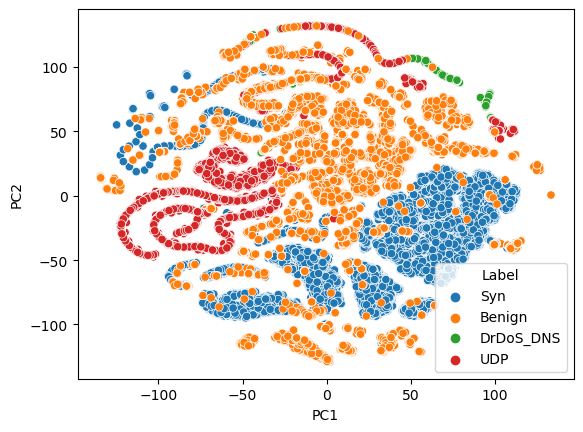

In [69]:
tsne100 = TSNE(n_components=2, verbose=1, random_state=123, perplexity=100)
df_tsne100 = pd.DataFrame(tsne100.fit_transform(df.drop('Label', axis=1)), columns=['PC1', 'PC2'])
df_tsne100['Label'] = df['Label'].values
plot_tsne(df_tsne100)

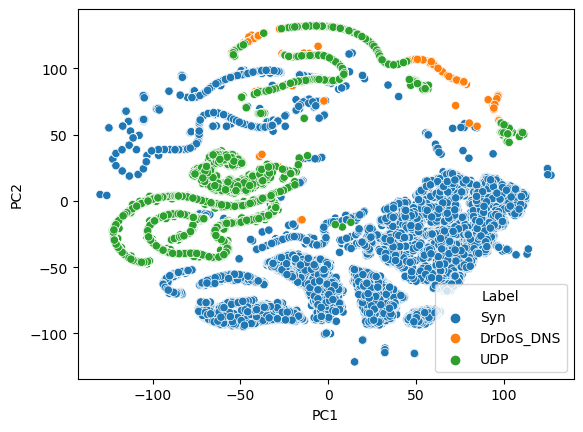

In [70]:
plot_tsne(df_tsne100[df_tsne100['Label'] != 'Benign'])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 61763 samples in 0.022s...
[t-SNE] Computed neighbors for 61763 samples in 10.889s...
[t-SNE] Computed conditional probabilities for sample 1000 / 61763
[t-SNE] Computed conditional probabilities for sample 2000 / 61763
[t-SNE] Computed conditional probabilities for sample 3000 / 61763
[t-SNE] Computed conditional probabilities for sample 4000 / 61763
[t-SNE] Computed conditional probabilities for sample 5000 / 61763
[t-SNE] Computed conditional probabilities for sample 6000 / 61763
[t-SNE] Computed conditional probabilities for sample 7000 / 61763
[t-SNE] Computed conditional probabilities for sample 8000 / 61763
[t-SNE] Computed conditional probabilities for sample 9000 / 61763
[t-SNE] Computed conditional probabilities for sample 10000 / 61763
[t-SNE] Computed conditional probabilities for sample 11000 / 61763
[t-SNE] Computed conditional probabilities for sample 12000 / 61763
[t-SNE] Computed conditional probabilities for s

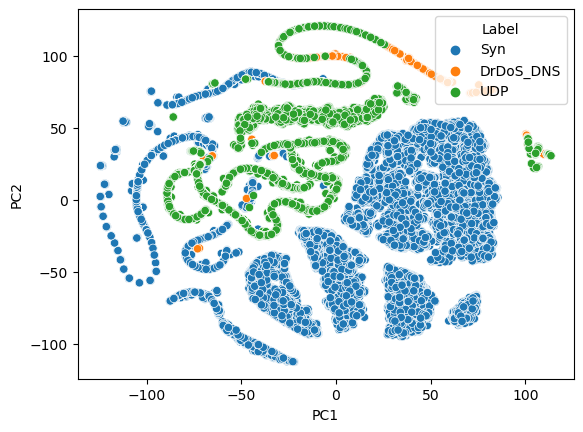

In [73]:
# fit t-SNE to the data
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=100)
df_tsne = pd.DataFrame(tsne.fit_transform(df[df['Label'] != 'Benign'].drop('Label', axis=1)), columns=['PC1', 'PC2'])
df_tsne['Label'] = df[df['Label'] != 'Benign']['Label'].values
plot_tsne(df_tsne)

In [72]:
df_tsne100.to_parquet('data/results/df_tsne.parquet')

In [74]:
df_tsne.to_parquet('data/results/df_tsne_no_benign.parquet')